In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

data_dir = "../data/"

In [2]:

food_production = pd.read_csv(data_dir+'food production.csv')

In [3]:

print(food_production.head(2))

  Country Code  Year  Cereal production (metric tons)  \
0          USA  1961                      163619978.0   
1          USA  1962                      162455780.0   

   Food production index (2014-2016 = 100)  
0                                    41.25  
1                                    41.31  


In [4]:
# create a new sqlite database
conn = sqlite3.connect('../food_inflation_analysis.db')

In [5]:
# query the database to get the train data
query = '''SELECT * FROM OCED_USA_FOOD_INFLATION'''
cpi_food_data = pd.read_sql(query, conn)
cpi_food_data.index = pd.to_datetime(cpi_food_data['Date'])
cpi_food_data.drop('Date', axis=1, inplace=True)
# print head
print(cpi_food_data.head(5))


            Inflation
Date                 
1956-01-01  -1.700680
1956-02-01  -2.372881
1956-03-01  -2.033898
1956-04-01  -1.689189
1956-05-01  -0.337838


0    1970-01-01 00:00:00.000001961
1    1970-01-01 00:00:00.000001962
2    1970-01-01 00:00:00.000001963
3    1970-01-01 00:00:00.000001964
4    1970-01-01 00:00:00.000001965
                  ...             
56   1970-01-01 00:00:00.000002017
57   1970-01-01 00:00:00.000002018
58   1970-01-01 00:00:00.000002019
59   1970-01-01 00:00:00.000002020
60   1970-01-01 00:00:00.000002021
Name: Year, Length: 61, dtype: datetime64[ns]


Text(0.5, 0, 'Year')

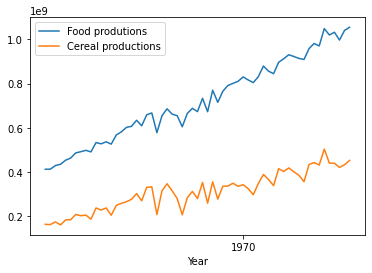

In [6]:
# Food production processing
time = food_production["Year"]
time = pd.to_datetime(time)
print(time)

Cereal_production=food_production["Cereal production (metric tons)"]

Food_p=food_production["Food production index (2014-2016 = 100)"]*10e6

plt.plot(time,Food_p,label="Food produtions")
plt.plot(time,Cereal_production,label="Cereal productions")
plt.legend()

plt.xlabel("Year")


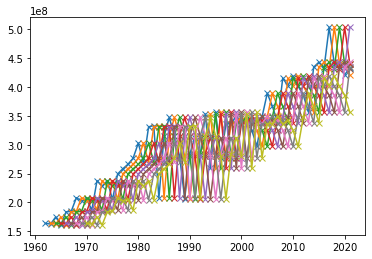

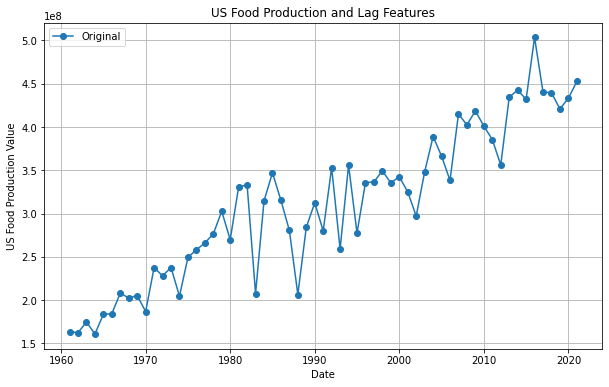

In [7]:
for lag in range(1, 10):  # You can change the range for the number of lags you want
    food_production[f'lag_{lag}'] = food_production['Cereal production (metric tons)'].shift(lag)
    plt.plot(food_production["Year"], food_production[f'lag_{lag}'], label=f'Lag {lag}', marker='x')
plt.figure(figsize=(10, 6))
plt.plot(food_production["Year"], food_production['Cereal production (metric tons)'], label='Original', marker='o')

plt.title('US Food Production and Lag Features')
plt.xlabel('Date')
plt.ylabel('US Food Production Value')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
food_production.columns

Index(['Country Code', 'Year', 'Cereal production (metric tons)',
       'Food production index (2014-2016 = 100)', 'lag_1', 'lag_2', 'lag_3',
       'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9'],
      dtype='object')

In [10]:
test_df

,Food production index (2014-2016 = 100),lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9
0,41.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41.31,163619978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42.94,162455780.0,163619978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43.49,174812487.0,162455780.0,163619978.0,NaN,NaN,NaN,NaN,NaN,NaN
4,45.35,160937079.0,174812487.0,162455780.0,163619978.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
56,101.96,503466147.2,431870370.6,442849090.0,434308450.0,356210124.0,385545255.8,401126329.7,418666166.1,402399936.0
57,103.20,440271775.0,503466147.2,431870370.6,442849090.0,434308450.0,356210124.0,385545255.8,401126329.7,418666166.1
58,99.65,439707894.8,440271775.0,503466147.2,431870370.6,442849090.0,434308450.0,356210124.0,385545255.8,401126329.7
59,104.05,420869946.6,439707894.8,440271775.0,503466147.2,431870370.6,442849090.0,434308450.0,356210124.0,385545255.8


In [12]:
# 创建一个整数列表，包含你想要选择的列的位置
cols_to_select = [2] + list(range(4, food_production.shape[1]))

# 使用 iloc 和这个整数列表来选择列
test_df = food_production.iloc[:, cols_to_select]

In [13]:
test_df

,Cereal production (metric tons),lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9
0,163619978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,162455780.0,163619978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,174812487.0,162455780.0,163619978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,160937079.0,174812487.0,162455780.0,163619978.0,NaN,NaN,NaN,NaN,NaN,NaN
4,183602617.0,160937079.0,174812487.0,162455780.0,163619978.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
56,440271775.0,503466147.2,431870370.6,442849090.0,434308450.0,356210124.0,385545255.8,401126329.7,418666166.1,402399936.0
57,439707894.8,440271775.0,503466147.2,431870370.6,442849090.0,434308450.0,356210124.0,385545255.8,401126329.7,418666166.1
58,420869946.6,439707894.8,440271775.0,503466147.2,431870370.6,442849090.0,434308450.0,356210124.0,385545255.8,401126329.7
59,433256752.7,420869946.6,439707894.8,440271775.0,503466147.2,431870370.6,442849090.0,434308450.0,356210124.0,385545255.8


In [14]:

correlation_matrix=test_df.corr()
print(correlation_matrix['Cereal production (metric tons)'])

Cereal production (metric tons)    1.000000
lag_1                              0.865648
lag_2                              0.857672
lag_3                              0.841542
lag_4                              0.840451
lag_5                              0.852577
lag_6                              0.825000
lag_7                              0.812509
lag_8                              0.799788
lag_9                              0.784027
Name: Cereal production (metric tons), dtype: float64


In [15]:
food_production.shape

(61, 13)

In [16]:
# Rename the columns of food_production dataframe
food_production.rename(columns={'Food production index (2014-2016 = 100)': 'Food_Production', 'Cereal production (metric tons)': 'Cereal_Production'}, inplace=True)
food_production.drop(['Country Code'], axis=1, inplace=True)
print(food_production.columns)


Index(['Year', 'Cereal_Production', 'Food_Production', 'lag_1', 'lag_2',
       'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9'],
      dtype='object')


In [18]:
train_food_production = food_production[['Year','Cereal_Production','lag_1']]

In [19]:
train_food_production

,Year,Cereal_Production,lag_1
0,1961,163619978.0,NaN
1,1962,162455780.0,163619978.0
2,1963,174812487.0,162455780.0
3,1964,160937079.0,174812487.0
4,1965,183602617.0,160937079.0
...,...,...,...
56,2017,440271775.0,503466147.2
57,2018,439707894.8,440271775.0
58,2019,420869946.6,439707894.8
59,2020,433256752.7,420869946.6


In [20]:
# save train data to the sqlite database as a new table named OCED_USA_FOOD_INFLATION
train_food_production.to_sql('food_production', conn, if_exists='replace', index=False)

61

In [ ]:
cpi_food_data

,Inflation
Date,
1956-01-01,-1.700680
1956-02-01,-2.372881
1956-03-01,-2.033898
1956-04-01,-1.689189
1956-05-01,-0.337838
...,...
2022-08-01,13.533210
2022-09-01,12.927050
2022-10-01,12.439140


In [ ]:
# get the correlation between the cpi and the imports/exports
# align indexes of the dataframes
cpi_food_data_yearly = cpi_food_data.resample('Y').mean()
cpi_food_data_yearly.index = cpi_food_data_yearly.index.year
# align indexes of the dataframes
# align index name
cpi_food_data_yearly.index.name = 'Year'

# print head
print(cpi_food_data_yearly.head(5))
print(food_production.head(5))

# inner join the dataframes
food_production_combined = food_production.join(cpi_food_data_yearly, how='inner', on='Year')

# lag import and export data by 1 year
meat_exports_lag = food_production_combined['Food_Production'].shift(1)

# add lagged data to the dataframe
food_production_combined['Food_Production_lag'] = meat_exports_lag

# drop the first row of the dataframe
food_production_combined.dropna(inplace=True)

# print head
print(food_production_combined.head(5))


      Inflation
Year           
1956   0.595752
1957   3.238256
1958   4.372906
1959  -2.383241
1960   0.913196
   Year  Cereal_Production  Food_Production  lag_1  lag_2  lag_3  lag_4  \
0  1961        163619978.0            41.25    NaN    NaN    NaN    NaN   
1  1962        162455780.0            41.31  41.25    NaN    NaN    NaN   
2  1963        174812487.0            42.94  41.31  41.25    NaN    NaN   
3  1964        160937079.0            43.49  42.94  41.31  41.25    NaN   
4  1965        183602617.0            45.35  43.49  42.94  41.31  41.25   

   lag_5  lag_6  lag_7  lag_8  lag_9  
0    NaN    NaN    NaN    NaN    NaN  
1    NaN    NaN    NaN    NaN    NaN  
2    NaN    NaN    NaN    NaN    NaN  
3    NaN    NaN    NaN    NaN    NaN  
4    NaN    NaN    NaN    NaN    NaN  
    Year  Cereal_Production  Food_Production  lag_1  lag_2  lag_3  lag_4  \
9   1970        186860751.0            49.11  49.82  49.19  48.66  46.31   
10  1971        237624461.0            53.32  49.11

In [ ]:
# Find correlation between cpi and imports/exports of current year
export_corr = food_production_combined['Food_Production'].corr(food_production_combined['Inflation'])


# Find correlation between cpi and imports/exports of previous year
export_corr_lag = food_production_combined['Food_Production_lag'].corr(food_production_combined['Inflation'])

print("Correlation between CPI and Exports: ", export_corr)

print("Correlation between CPI and Exports of previous year: ", export_corr_lag)

# get confidence intervals for the correlation

# exports
# get the standard error
export_se = 1 / np.sqrt(len(food_production_combined['Food_Production_lag']))
# get the z-score
export_z = np.arctanh(export_corr_lag)
# get the confidence interval
export_ci = export_z + np.array([-1, 1]) * export_se * 1.96
# convert back to correlation
export_ci = np.tanh(export_ci)
print("Confidence interval for correlation between CPI and Exports: ", export_ci)

Correlation between CPI and Exports:  -0.5594780566344605
Correlation between CPI and Exports of previous year:  -0.571863436447763
Confidence interval for correlation between CPI and Exports:  [-0.72688489 -0.36139048]
